# Fixing Features to fit Assumptions of LinReg
Judging from the diagnostic plots, I'll identify what assumptions our dataset does not meet and fix them.

In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.preprocessing import normalize


from scipy.stats import norm
from scipy import stats

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


## Assumption 1: Multivariate Normality

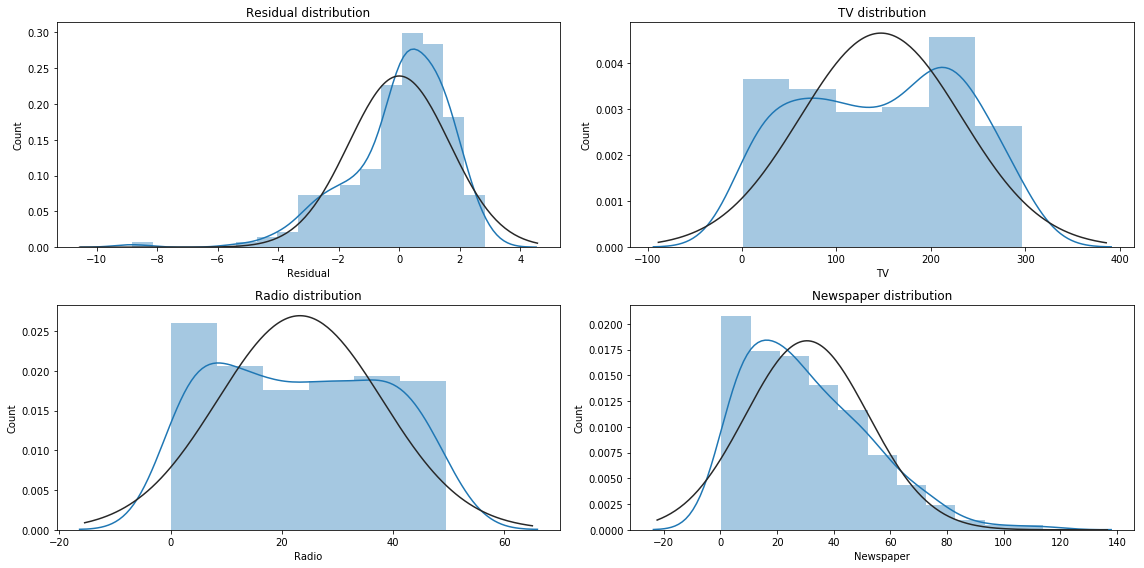

In [3]:
# extract predicted values
predicted = regr.predict(X).ravel()
actual = data['Sales']
from scipy import stats


# calculate the error, also called the residual
residual = actual - predicted

# plot Residual
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 8))
_ = sns.distplot(residual, fit = norm, ax = ax[0,0])
_.set(title = 'Residual distribution', xlabel = 'Residual', ylabel = 'Count')


# plot TV histogram
_ = sns.distplot(data.TV, fit = norm, ax = ax[0,1])
_.set(title = 'TV distribution', xlabel = 'TV', ylabel = 'Count')

# plot Radio histogram
_ = sns.distplot(data.Radio, fit = norm, ax = ax[1,0])
_.set(title = 'Radio distribution', xlabel = 'Radio', ylabel = 'Count')

# plot Newspaper distribution
_ = sns.distplot(data.Newspaper, fit = norm, ax = ax[1,1])
_.set(title = 'Newspaper distribution', xlabel = 'Newspaper', ylabel = 'Count')
plt.tight_layout()

plt.show()

We can easily observe that residual distribution has some negative skewness. This can be due to the non-normal distribution of the features. Also, the KDE line of distplot shows that TV and Radio have a variance decrease when their values approach 150 and 22, accordingly. It sounds good to remove those values and raise each variable to the power of two then take a log to normalize the distribution. To normalize the Newspaper distribution, I'll take a log of variable. 

In [4]:
# normalize the variables   
data['TV'] = np.log(np.square(data.TV-150))
data['Newspaper'] = np.log(data.Newspaper)
data['Radio'] = np.log(data.Radio+1)

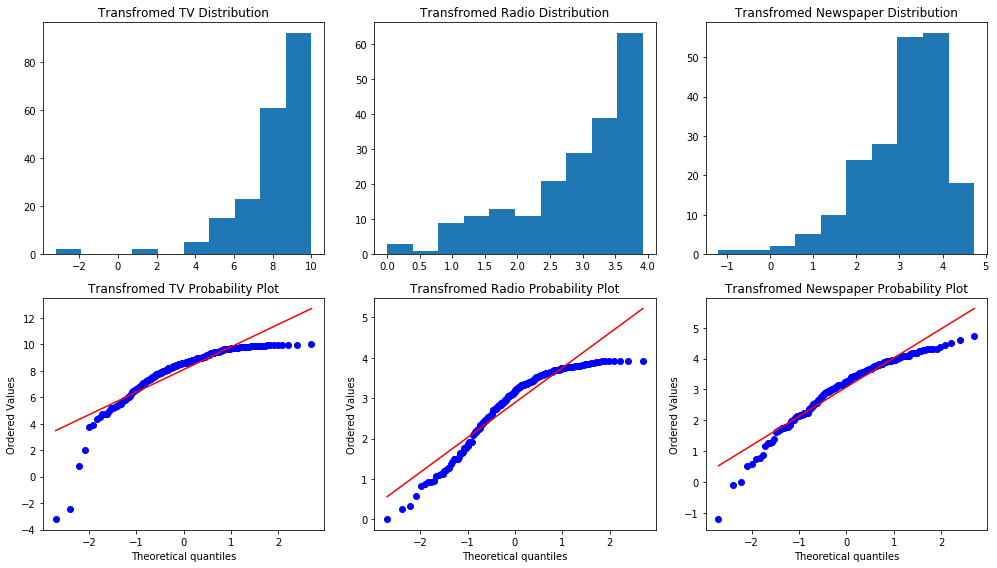

In [5]:
plt.figure(figsize = (14, 8))

# plot histogram for TV
plt.subplot(231)
plt.hist(data.TV)
plt.title('Transfromed TV Distribution')

# plot histogram for Radio
plt.subplot(232)
_  = plt.hist(data.Radio)
plt.title('Transfromed Radio Distribution')

# plot histogram for Newspaper
plt.subplot(233)
plt.hist(data.Newspaper)
plt.title('Transfromed Newspaper Distribution')

# probability plots
plt.subplot(234)
res = stats.probplot(data.TV, plot=plt)
plt.title('Transfromed TV Probability Plot')

plt.subplot(235)
res = stats.probplot(data.Radio, plot=plt)
plt.title('Transfromed Radio Probability Plot')

plt.subplot(236)
res = stats.probplot(data.Newspaper, plot=plt)
plt.title('Transfromed Newspaper Probability Plot')
plt.tight_layout()
plt.show()

After trying sigmoid fuction, normalize After trying sigmoid function, normalization function and log function, I decided to go with log. I normalized 2 variables and the result is not the best. 

## Assumption 2: Homoscedasticity

Homoscedasticity means that the distribution of residuals (its "scedasticity"), should be consistent for all predicted values. Using scatter plots I'll check the homoscedasticity.

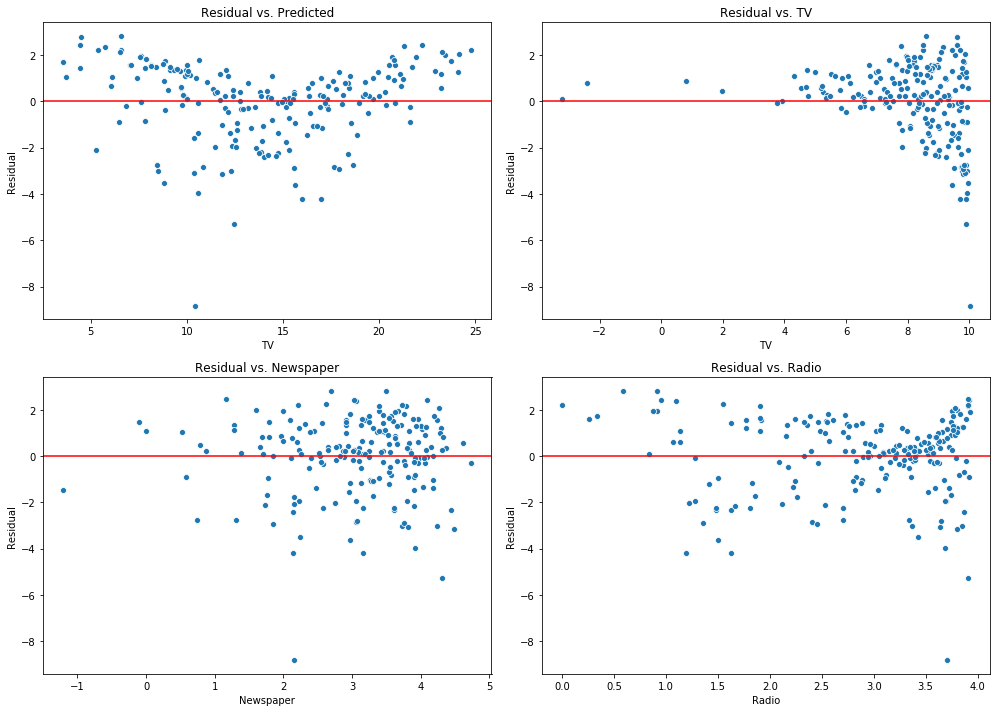

In [6]:
# calculate residual
residual = actual - predicted

# plot Residual vs. Predicted
plt.figure(figsize = (14,10))
plt.subplot(221)
_ = sns.scatterplot(predicted, residual)
_.axhline(y=0, color = 'r')
_.set(title = 'Residual vs. Predicted', xlabel = 'TV', ylabel = 'Residual')

# plot Residual vs. TV
plt.subplot(222)
_ = sns.scatterplot(data.TV, residual)
_.axhline(y=0, color = 'r')
_.set(title = 'Residual vs. TV', xlabel = 'TV', ylabel = 'Residual')

# plor Residual vs. Newspaper
plt.subplot(223)
_ = sns.scatterplot(data.Newspaper, residual)
_.axhline(y=0, color = 'r')
_.set(title = 'Residual vs. Newspaper', xlabel = 'Newspaper', ylabel = 'Residual')

# plot Residual vs. Radio 
plt.subplot(224)
_ = sns.scatterplot(data.Radio, residual)
_.axhline(y=0, color = 'r')
_.set(title = 'Residual vs. Radio', xlabel = 'Radio', ylabel = 'Residual')

# Newspaper distribution
plt.tight_layout()

plt.show()

Just by ensuring normality in the variables, we solved the homoscedasticity problem. Let see residual distribution with transformed variables.

In [7]:
# instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-0.35752968  3.07742854  0.27745693]]

Intercept: 
 [7.1700225]

R-squared:
0.30704067117447875


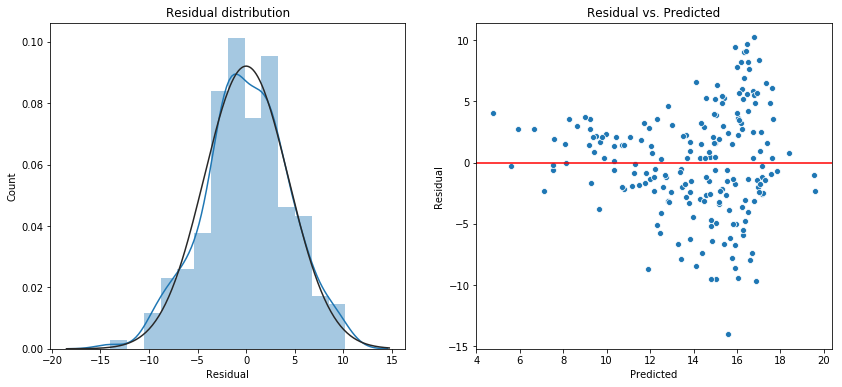

In [9]:
# extract predicted values
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# lot residual distribution
plt.figure(figsize = (14, 6))
plt.subplot(121)
_ = sns.distplot(residual, fit = norm)
_.set(title = 'Residual distribution', xlabel = 'Residual', ylabel = 'Count')

# plot residual vs. predicted scatter plot
plt.subplot(122)
_ = sns.scatterplot(predicted, residual)
_.axhline(y=0, color = 'r')
_.set(title = 'Residual vs. Predicted', xlabel = 'Predicted', ylabel = 'Residual')

plt.show()